
# Jupiter/IPython notebook widgets

<br />

## Ivan (@vanzaj)

<br />

## PyData SG meetup, 13 Oct 2015


In [89]:
from IPython.display import HTML, display
import ipywidgets as wdg

def embed_url(url, width=800, height=450):
    src='<iframe src="%s"  width="%d" height="%d"></iframe>' % (url, 800, 450)
    display(HTML(src))

In [90]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap('gray');

In [24]:
import nibabel as nib
nimg = nib.load('../data/anon_anatomy.nii.gz')
data = nimg.get_data().astype(nimg.get_data_dtype())

('Data info:', <type 'numpy.ndarray'>, dtype('uint8'), (57, 67, 56))


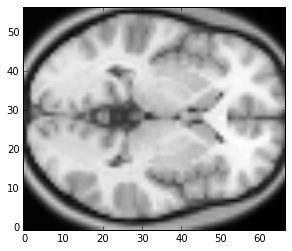

In [68]:
print("Data info:", type(data), data.dtype, data.shape)

plt.imshow( data[:, :, 25], origin='lower');

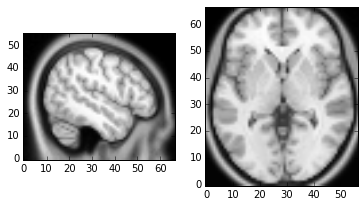

In [53]:
def show_vol(axe1=0, axe2=0):
    plt.subplot(121)
    im = data[axe1, :,:]
    plt.imshow(im.T, origin='lower')
    
    plt.subplot(122)
    im = data[:, :, axe2]
    plt.imshow(im.T, origin='lower')
    
show_vol(10, 25)

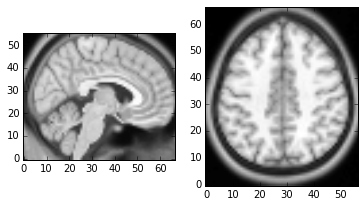

In [54]:
Nx, Ny, Nz = data.shape

wdg.interact(show_vol, axe1=(0, Nx-1), axe2=(0, Nz-1))

# code cells + markdown = ❤ ❤ ❤

In [1]:
print("Saluton mondo!")

Saluton mondo!


In [2]:
!python -m this | head -5 | tail -3

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.


In [5]:
embed_url('https://en.wikipedia.org/wiki/Literate_programming')

In [57]:
embed_url('https://www.oreilly.com/ideas/jupyter-at-oreilly')

In [6]:
embed_url('http://worrydream.com/ExplorableExplanations/')

In [58]:
import ipywidgets as wdg

In [59]:
def f(x=1):
    print('OMG!' * x)

In [60]:
wdg.interact(f, x=5)

In [62]:
@wdg.interact(text='')
def h(text=''):
    res = ' '.join(np.random.permutation(text.split()))
    print(res)

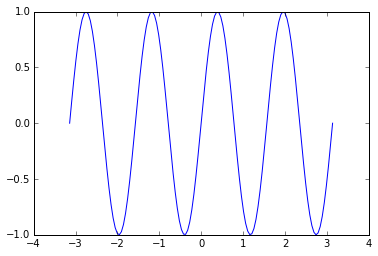

In [15]:
x = np.linspace(-np.pi, np.pi, 128)

@wdg.interact(freq=(1,10))
def plot_sine(freq=1):
    y = np.sin(x*freq)
    plt.plot(x, y)

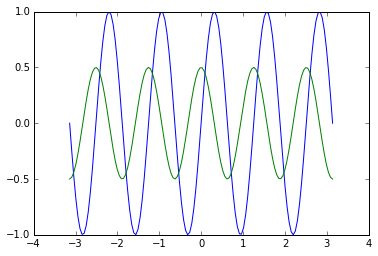

In [16]:
@wdg.interact(freq=(1,10), show_y1=False)
def plot_sine(freq=1, show_y1=False):
    y = np.sin(x*freq)
    plt.plot(x, y)
    if show_y1:
        y1 = 0.5 * np.cos(x*freq)
        plt.plot(x, y1)

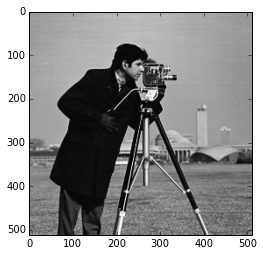

In [70]:
import skimage.data

img = skimage.data.camera()
plt.imshow(img, cmap=plt.get_cmap('gray'))

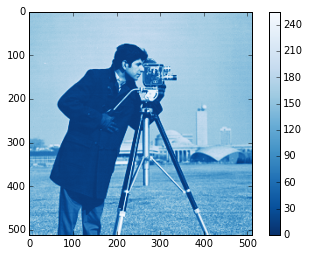

In [71]:
cnames = [name for name in plt.colormaps() if name.endswith('_r')]

@wdg.interact(cname=cnames)
def showimg(cname=''):
    plt.imshow(img, cmap=plt.get_cmap(cname))
    plt.colorbar()

146

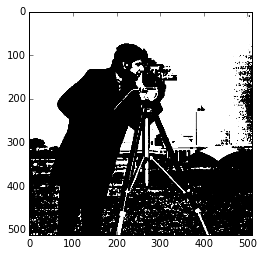

In [72]:
def img_thres(thres=10):
    plt.imshow(img > thres)
    return thres

W = wdg.interactive(img_thres, thres=(0,255))
display(W)

In [22]:
print W.result

78


In [74]:
import pandas as pd

df = pd.read_csv("../data/2013-Nov_chicago-salaries.csv.gz", compression='gzip')
df.head()

,Name,Position Title,Department,Employee Annual Salary
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,$85512.00
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,$75372.00
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,$80916.00
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,$99648.00
4,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,$89440.00


In [75]:
df = pd.read_csv("../data/2013-Nov_chicago-salaries.csv.gz", compression='gzip',
                 header=False, names=['name', 'title', 'department', 'salary'], 
                 converters={"salary": lambda x: float(x.replace('$', ''))})

df.head()

,name,title,department,salary
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,85512
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,75372
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,80916
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,99648
4,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,89440


In [88]:
@wdg.interact(colname=list(df.columns), ascend=False)
def sortdf(colname='name', ascend=False):
    display(df.sort(colname, ascending=ascend).head(10))

,name,title,department,salary
16517,"MC CARTHY, GARRY F",SUPERINTENDENT OF POLICE,POLICE,260004
7317,"EMANUEL, RAHM",MAYOR,MAYOR'S OFFICE,216210
23445,"SANTIAGO, JOSE A",FIRE COMMISSIONER,FIRE,202728
25279,"STEWART III, CHARLES",FIRST DEPUTY FIRE COMMISSIONER,FIRE,188316
28942,"WYSINGER, ALFONZA",FIRST DEPUTY SUPERINTENDENT,POLICE,188316
685,"ANDOLINO, ROSEMARIE S",COMMISSIONER OF AVIATION,AVIATION,186576
26521,"TRACY, ROBERT J",CHIEF,POLICE,185004
17557,"MINIOTIS, CONSTANTINE",SUPERINTENDENT'S CHIEF OF STAFF,POLICE,185004
8222,"FORD II, RICHARD C",DEPUTY FIRE COMMISSIONER,FIRE,178740
17043,"MC NICHOLAS, JOHN",DEPUTY FIRE COMMISSIONER,FIRE,178740
